# Tensorflow intro

This tutorial shows the basic usage of tensorflow to train neural networks

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Simple NN for classification

## Data processing
Read data and convert them to numerical inputs

In [3]:
X, y = make_classification(n_samples=20000, n_features=8, n_informative=5, 
                           n_redundant=0, n_classes=2, random_state=1)

In [4]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
print('train size: {}, target_ratio: {:.3f}'.format(X_train.shape, np.mean(y_train)))
print('test size: {}, target_ratio: {:.3f}'.format(X_test.shape, np.mean(y_test)))
print('dev size: {}, target_ratio: {:.3f}'.format(X_dev.shape, np.mean(y_dev)))

train size: (12800, 8), target_ratio: 0.502
test size: (4000, 8), target_ratio: 0.501
dev size: (3200, 8), target_ratio: 0.502


## Building a simple model with tf.keras

Very useful documentations with many examples and detailed explanation of everything you might need:
 - https://www.tensorflow.org/api_docs/python/tf/keras/
 - https://keras.io/api/

Contain everything about:
  - Model building: Activations, Losses, Optimizers, Regularization
  - Data processing
  - Pretrained models and datasets
  - Automatic differentiation
  - ...

  

### Model speficication

three APIs for building the model
   - sequential - easy to code, but less flexible - we will use it sometimes
   - functional - flexible and still easy to code - we will use it the most
   - model subclassing - rather complicated and not very much used - we will skip it

#### Sequential API

(https://www.tensorflow.org/guide/keras/sequential_model)

Easy to code but <span style="color:red"> NOT </span> appropriate when:

- Your model has multiple inputs or multiple outputs
- Any of your layers has multiple inputs or multiple outputs
- You need to do layer sharing
- You want non-linear topology (e.g. a residual connection, a multi-branch model)

In [7]:
# Specification A)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([X_train.shape[1],]), # Create input layer with 'input data' neurons
    tf.keras.layers.Dense(10, activation="relu"), # Create hidden layer with 10 neurons and ReLU activation
    tf.keras.layers.Dense(1, activation="sigmoid"), # Create output layer with one neuron and sigmoid activation
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Specification B)

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                90        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


#### Functional API

(https://www.tensorflow.org/guide/keras/functional)

The Keras functional API is a way to create models that are more flexible than the tf.keras.Sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. So the functional API is a way to build graphs of layers.



In [9]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

hidden = tf.keras.layers.Dense(10)(inputs)
hidden = tf.keras.activations.relu(hidden)
hidden = tf.keras.layers.Dense(1)(hidden)
outputs = tf.keras.activations.sigmoid(hidden)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name='Model')

In [10]:
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_4 (Dense)             (None, 10)                90        
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
 tf.math.sigmoid (TFOpLambda  (None, 1)                0         
 )                                                               
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_______________________________________________________________

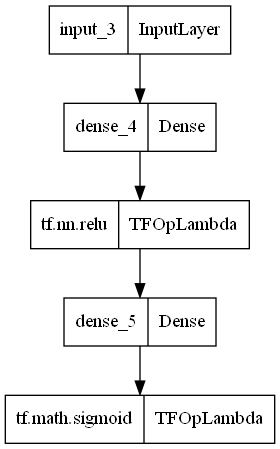

In [11]:
# TODO: To make the following line work you need to install graphviz (if you have not done so in one of the previous classes)
# 1) follow the instructions https://graphviz.gitlab.io/download/?fbclid=IwAR1V-lrRhho5rSfBVYXYISsighqRwOCOgMHLmL_DclkQrPtMXQaKj3mFcqs
# 2) this notebook has been tested with version 8.0.3
# 3) make sure you add it to the PATH variable (you are specifically asked during the installation) at least for local user

tf.keras.utils.plot_model(model)

### Model compilation and training

In [12]:
# compile the model with selected optimizer, loss and metrics
model.compile(
        optimizer=tf.optimizers.Adam(), # Several other possibilities for optimizers 
        loss=tf.losses.BinaryCrossentropy(), # Select the proper loss for the task
        metrics=[tf.keras.metrics.AUC(), tf.keras.metrics.BinaryAccuracy()], # Select the proper metrics for the task
)

In [13]:
print('\n>>> Bias of the last layers:')
print(model.layers[3].weights[1].numpy())

print('\n>>> Kernel of the last layers:')
print(model.layers[3].weights[0].numpy())

print('\n>>> Bias of the first layers:')
print(model.layers[1].weights[1].numpy())

print('\n>>> Kernel of the first layers:')
print(model.layers[1].weights[0].numpy())


>>> Bias of the last layers:
[0.]

>>> Kernel of the last layers:
[[ 0.19612968]
 [-0.3026884 ]
 [-0.735668  ]
 [ 0.19132507]
 [-0.22722751]
 [-0.14063287]
 [-0.67856157]
 [ 0.43344396]
 [-0.3512058 ]
 [ 0.11258548]]

>>> Bias of the first layers:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

>>> Kernel of the first layers:
[[-0.07274956 -0.46412513  0.09331912 -0.06977612 -0.37824947 -0.18920904
  -0.07830912  0.21708542  0.27495092  0.24183428]
 [-0.56813633  0.18594605 -0.5052916   0.13720435 -0.405787   -0.41524303
   0.11841249 -0.08331382 -0.21324912 -0.50504935]
 [ 0.3782339  -0.16453165  0.46565866 -0.1178714  -0.2502025  -0.13668293
  -0.1497606  -0.4473514  -0.4111215  -0.4336331 ]
 [ 0.4636935   0.35395944  0.04046017 -0.57467693 -0.5551227   0.11824417
  -0.22216049 -0.44149613  0.30213684  0.04075766]
 [ 0.26896375  0.03381163 -0.48143297  0.42115378 -0.01964128  0.37231684
   0.2093386   0.12093443  0.36429513  0.38372594]
 [ 0.41122627 -0.45802182  0.18631285 -0.36689532 -0.23813519

In [14]:
# train the model with default setting
model.fit(X_train, y_train, batch_size=64, epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 1ms/step - loss: 0.5526 - auc: 0.8072 - binary_accuracy: 0.7249
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4285 - auc: 0.8979 - binary_accuracy: 0.8155
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3766 - auc: 0.9184 - binary_accuracy: 0.8381
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3440 - auc: 0.9327 - binary_accuracy: 0.8591
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3195 - auc: 0.9423 - binary_accuracy: 0.8744
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3012 - auc: 0.9489 - binary_accuracy: 0.8825
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.2875 - auc: 0.9529 - binary_accuracy: 0.8909
Epoch 8/100
200/200 [==============================] - 0s 1ms/step - loss: 0.2782 - auc: 0.9554 - binary_accuracy: 0.8961
Epoch 9/100
200/200 [===

In [15]:
# Evaluate the model and predict for the test data
model.evaluate(X_test, y_test)
test_pred = model.predict(X_test)

125/125 [==============================] - 0s 1ms/step - loss: 0.2245 - auc: 0.9700 - binary_accuracy: 0.9240


In [16]:
for pred, true in zip(test_pred, y_test[0:10]):
    print('{} - {:.2f}'.format(true, pred[0]))

1 - 0.29
0 - 0.23
0 - 0.58
1 - 0.99
0 - 0.00
0 - 0.01
1 - 0.99
0 - 0.00
1 - 0.83
1 - 1.00


### Add early stopping and regularization

In [17]:
# Input layer
inputs = tf.keras.Input(shape=(X_train.shape[1]))

# Hidden layer with regularization and ReLU
hidden = tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(inputs)
hidden = tf.keras.activations.relu(hidden)

# Output layer with regularization and sigmoid
outputs = tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.001))(hidden)
outputs = tf.keras.activations.sigmoid(outputs)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name='RegularizedModel')

model.compile(
        optimizer=tf.optimizers.Adam(),
        loss=tf.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.AUC(), tf.keras.metrics.BinaryAccuracy()],
)

model.summary()

Model: "RegularizedModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_6 (Dense)             (None, 10)                90        
                                                                 
 tf.nn.relu_1 (TFOpLambda)   (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
 tf.math.sigmoid_1 (TFOpLamb  (None, 1)                0         
 da)                                                             
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
____________________________________________________

In [18]:
epochs = 200

early_call = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

model.fit(X_train,
          y_train,
          epochs=epochs,
          validation_data=(X_dev, y_dev),
          callbacks=[early_call])

Epoch 1/200
400/400 [==============================] - 1s 2ms/step - loss: 0.7123 - auc_1: 0.6211 - binary_accuracy: 0.5993 - val_loss: 0.5483 - val_auc_1: 0.8246 - val_binary_accuracy: 0.7559
Epoch 2/200
400/400 [==============================] - 1s 2ms/step - loss: 0.4949 - auc_1: 0.8603 - binary_accuracy: 0.7919 - val_loss: 0.4341 - val_auc_1: 0.8971 - val_binary_accuracy: 0.8209
Epoch 3/200
400/400 [==============================] - 1s 2ms/step - loss: 0.4098 - auc_1: 0.9080 - binary_accuracy: 0.8333 - val_loss: 0.3695 - val_auc_1: 0.9290 - val_binary_accuracy: 0.8597
Epoch 4/200
400/400 [==============================] - 1s 2ms/step - loss: 0.3557 - auc_1: 0.9335 - binary_accuracy: 0.8662 - val_loss: 0.3316 - val_auc_1: 0.9446 - val_binary_accuracy: 0.8803
Epoch 5/200
400/400 [==============================] - 1s 2ms/step - loss: 0.3243 - auc_1: 0.9460 - binary_accuracy: 0.8844 - val_loss: 0.3098 - val_auc_1: 0.9509 - val_binary_accuracy: 0.8856
Epoch 6/200
400/400 [==============

### Gridsearch and Tensorboard
Run gridsearch over hidden layer size, L2 regularization, activation, check the outputs in Tensorboard

I recommend not to run Tensorboard from Jupyter notebook but from terminal directly

use "tensorboard --logdir logs" in command line

In [19]:
# hidden_sizes = [2, 5, 10, 20, 50]
# l2_regs = [0.01, 0.001, 0.0001]
# activations = ['relu', 'tanh']

hidden_sizes = [2, 5]
l2_regs = [0.01]
activations = ['relu', 'tanh']

epochs = 10
batch_size = 64

early_call = tf.keras.callbacks.EarlyStopping(monitor='val_AUC', mode='max', patience=10, restore_best_weights=True)

for activation in activations:
    for l2_reg in l2_regs:
        for hidden_size in hidden_sizes:
            if activation == 'relu':
                activate = tf.keras.activations.relu
            elif activation == 'tanh':
                activate = tf.keras.activations.tanh

            # Create Tensorboard Callback
            param_string = 'act-{},l2-{},hs-{}'.format(activation, l2_reg, hidden_size)
            log_dir = 'logs/binary_classification_test/' + param_string
            tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

            # Input layer
            inputs = tf.keras.Input(shape=(X_train.shape[1]))

            # Hidden layer with regularization and ReLU
            hidden = tf.keras.layers.Dense(hidden_size, kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(inputs)
            hidden = activate(hidden)

            # Output layer with regularization and sigmoid
            outputs = tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(hidden)
            outputs = tf.keras.activations.sigmoid(outputs)

            model = tf.keras.Model(inputs=inputs, outputs=outputs, name='RegularizedModel')

            model.compile(
                    optimizer=tf.optimizers.Adam(),
                    loss=tf.losses.BinaryCrossentropy(),
                    metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.BinaryAccuracy()],
            )

            # Train the model
            model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                      validation_data=(X_dev, y_dev),
                      callbacks=[early_call, tensorboard_callback])

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6318 - AUC: 0.7488 - binary_accuracy: 0.6536 - val_loss: 0.5849 - val_AUC: 0.8173 - val_binary_accuracy: 0.7022
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5571 - AUC: 0.8356 - binary_accuracy: 0.7041 - val_loss: 0.5221 - val_AUC: 0.8619 - val_binary_accuracy: 0.7306
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5171 - AUC: 0.8577 - binary_accuracy: 0.7574 - val_loss: 0.4954 - val_AUC: 0.8731 - val_binary_accuracy: 0.7922
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5004 - AUC: 0.8642 - binary_accuracy: 0.7786 - val_loss: 0.4837 - val_AUC: 0.8768 - val_binary_accuracy: 0.7984
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4918 - AUC: 0.8677 - binary_accuracy: 0.7859 - val_loss: 0.4778 - val_AUC: 0.8779 - val_binary_accuracy: 0.7978
Epoch 6/10
200/200 [==============================] - 0s 2ms

In [21]:
%load_ext tensorboard
%tensorboard --logdir=logs/binary_classification_test

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
